# Week 5 - Genetic Algorithms
---


# Genetic Algorithms

## Introduction
In computer science and operations research, a genetic algorithm (GA) is a metaheuristic beam search inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms (EA). Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems by relying on bio-inspired operators such as mutation, crossover and selection.

## Basic Concept
A Genetic Algorithm is a type of local search that mimics evolution by taking a population of strings, which encode possible solutions and combines them based on a fitness function to produce individuals that are more fit.

## Key Components

### Selection
Selection is the stage of a genetic algorithm in which individual genomes are chosen from a population for later breeding (using the crossover operator).

### Crossover
In GAs, crossover is a genetic operator used to vary the programming of a chromosome (or chromosomes) from one generation to the next. It is analogous to reproduction and biological crossover, upon which GA are based.

Crossover is a process of taking more than one parent solutions and producing a child solution from them.

### Mutation
Mutation is a genetic operator used to maintain genetic diversity from one generation of a population of genetic algorithm chromosomes to the next. It is analogous to biological mutation. Mutation alters one or more gene values in a chromosome from its initial state.



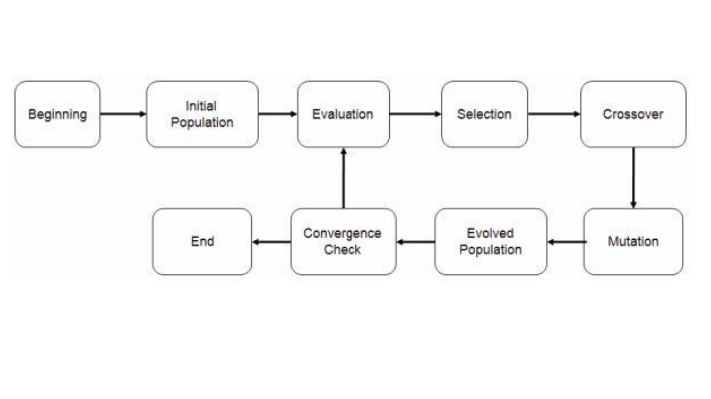

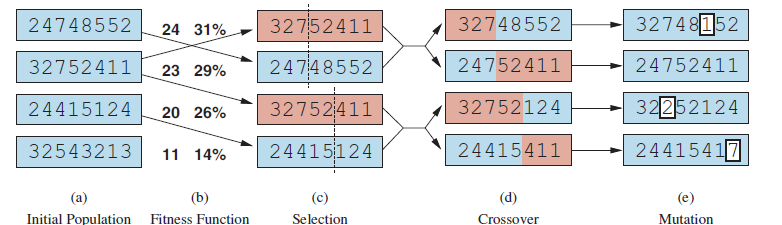

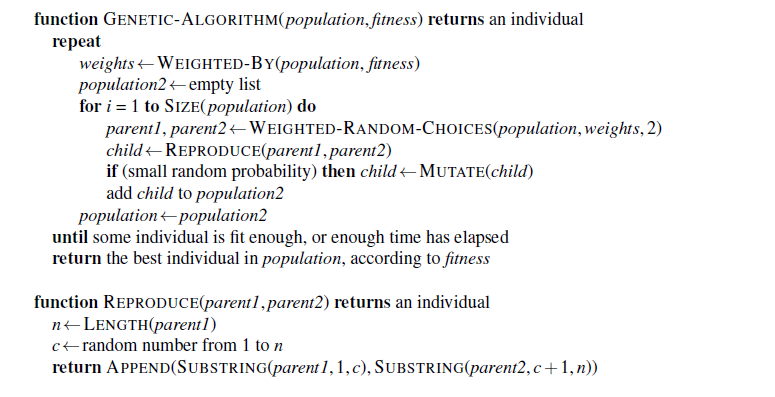

# Common Types of Crossover in Genetic Algorithms

## 1. One-Point Crossover (1PX)

This is the most basic form of crossover operation where a single crossover point is randomly selected, and all genes beyond that point are swapped between parents.

### How it Works:
1. Select a random crossover point
2. Exchange all genes after the crossover point
3. Create two new offspring

### Example:
```
Crossover Point: 4
Parent 1: 1101|0110
Parent 2: 1001|1011
         ↓    ↓
Child 1: 1101|1011
Child 2: 1001|0110
```

### Advantages:
- Simple to implement
- Computationally efficient
- Works well for binary encoding

### Disadvantages:
- Can disrupt building blocks
- Limited exploration of search space
- Position-dependent

## 2. Two-Point Crossover (2PX)

An extension of one-point crossover where two points are selected randomly, and the genetic material between these points is exchanged.

### How it Works:
1. Select two random crossover points
2. Exchange genes between the crossover points
3. Create two new offspring

### Example:
```
Crossover Points: 2 and 5
Parent 1: 11|011|010
Parent 2: 10|101|110
         ↓  ↓   ↓
Child 1: 11|101|010
Child 2: 10|011|110
```

### Advantages:
- Better than 1PX for preserving building blocks
- More exploration of search space
- Less positional bias

### Disadvantages:
- Slightly more complex than 1PX
- Still may disrupt some building blocks

## 3. Partially-Mapped Crossover (PMX)

Designed specifically for permutation problems where maintaining uniqueness of elements is crucial (e.g., Traveling Salesman Problem).

### How it Works:
1. Select two crossover points
2. Exchange the segment between points
3. Create a mapping relationship
4. Resolve conflicts using the mapping

### Example:
```
Parent 1: 1 2 3|4 5 6|7 8 9
Parent 2: 4 5 2|1 8 7|6 9 3
Mapping: 4↔1, 5↔8, 6↔7

Child 1: 4 2 3|1 8 7|6 5 9
Child 2: 1 8 2|4 5 6|7 9 3
```

### Advantages:
- Preserves permutation validity
- Maintains relative order
- Good for routing problems

### Disadvantages:
- Complex implementation
- Computationally intensive

## 4. Cycle Crossover (CX)

Designed to preserve absolute positions of elements from parents. Creates cycles of elements that must be kept together.

### How it Works:
1. Start with a position in Parent 1
2. Follow cycles between parents
3. Alternate cycle assignment between parents

### Example:
```
Parent 1: 1 2 3 4 5 6 7 8
Parent 2: 2 4 6 8 7 5 3 1

Cycle 1: 1→2→4→8→1
Cycle 2: 3→6→5→7→3

Child 1     : 1 2 6 4 7 5 3 8
Child 2     : 2 4 3 8 5 6 7 1

In cylce 1  : 1 1 0 1 0 0 0 1
In cylce 2  : 0 0 1 0 1 1 1 0
```

### Advantages:
- Preserves absolute positions
- Maintains permutation validity
- Good for position-based problems

### Disadvantages:
- Complex to implement
- May not preserve relative ordering

## 5. Uniform Crossover (UX)

Uses a randomly generated crossover mask to determine which parent contributes each gene to the offspring.

### How it Works:
1. Generate a random binary mask
2. Select genes from parents based on mask
3. Create new offspring using selected genes

### Example:
```
Parent 1:  1 1 0 1 1 0 1 0
Parent 2:  0 0 1 1 0 1 0 1
Mask:      1 0 1 0 1 1 0 0
           ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓
Child 1:   1 0 1 1 1 1 0 1
```

### Advantages:
- Unbiased with respect to position
- Maximum exploration potential
- Good for binary encoding

### Disadvantages:
- Can be highly disruptive
- May break useful gene combinations
- Not suitable for permutation problems

## Selection Considerations

When choosing a crossover operator, consider:

1. **Problem Encoding**
   - Binary → One-Point, Two-Point, Uniform
   - Permutation → PMX, Cycle
   - Real-valued → Arithmetic

2. **Problem Constraints**
   - Order importance
   - Position importance
   - Uniqueness requirements

3. **Computational Resources**
   - Simple vs. complex implementations
   - Processing time requirements
   - Memory constraints

4. **Solution Quality Requirements**
   - Exploration vs. exploitation
   - Building block preservation
   - Position bias importance

# Mutation in Genetic Algorithms

## Overview
Mutation is a genetic operator that introduces random changes in the population to maintain genetic diversity and prevent premature convergence. It helps explore new areas of the search space that may not be reachable through crossover alone.

## Types of Mutation

### 1. Bit Flip Mutation
Used primarily in binary-encoded genetic algorithms.

#### How it Works:
- Each bit has a small probability of being flipped (0→1 or 1→0)
- Typically uses a low mutation rate (e.g., 1/L where L is string length)
#### Example:
```
Original:    1 1 0 1 0 1 1 0
             ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓
Mutated:     1 1 0 0 0 1 0 0
                   ^     ^
(Bits at positions 4 and 8 were flipped)
```

### 2. Random Resetting
Similar to bit flip but used for integer representations.

#### Example:
```
Original:    4 2 8 5 1 7 3 6
             ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓
Mutated:     4 2 8 9 1 7 3 6
                   ^
(Value at position 4 was randomly reset)
```

### 3. Swap Mutation
Exchanges the position of two randomly chosen genes.

#### Example:
```
Original:    1 2 3 4 5 6 7 8
             ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓
Mutated:     1 7 3 4 5 6 2 8
               ^         ^
(Positions 2 and 7 were swapped)
```

### 4. Scramble Mutation
Randomly shuffles a subset of genes.

#### Example:
```
Original:    1 2 3 4 5 6 7 8
               |Selected|
Mutated:     1 5 3 2 4 6 7 8
               |Scrambled|
```

### 5. Inversion Mutation
Reverses the order of genes between two random points.

#### Example:
```
Original:    1 2 3 4 5 6 7 8
               |Inverted|
Mutated:     1 6 5 4 3 2 7 8
```

### 6. Gaussian Mutation
Used for real-valued encodings, adds a random value from a Gaussian distribution.

#### Example:
```
Original:    0.5  2.3  1.8  3.1
Mutated:     0.52 2.3  1.75 3.1
(Values slightly adjusted based on Gaussian noise)
```

## Mutation Rate



## Best Practices

### 1. Setting Good Mutation Rate
#### Standard Guidelines:
- Binary encoding: 1/L (L = chromosome length)
- Real-valued: 1/n (n = number of variables)
- Permutation: Lower rates (0.01-0.05)
- Adaptive Mutation might be a good idea:

    ```
    If (population diversity is low):
        Increase mutation rate
    Else:
        Decrease mutation rate
    ```

### 2. Implementation Considerations
- Ensure mutation maintains solution validity
- Consider problem constraints
- Balance exploration vs exploitation

### 3. Common Pitfalls
- Too high mutation rate → random search
- Too low mutation rate → premature convergence
- Wrong mutation type for encoding

---

# Classic toy example - evolving a string

## Implementation in class

In [1]:
from IPython.display import clear_output, display
from tqdm.auto import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
genes = "abcdefghijklmnopqrstuvwxyz "
target = "the quick brown fox jumps over the lazy dog"

In [3]:
len("abcdefghijklmnopqrstuvwxyz ")

27

In [4]:
dna_size = len("abcdefghijklmnopqrstuvwxyz ")

In [5]:
class GeneticStringGenerator:
    def __init__(self, print_every=500):
        self.print_every=print_every
        
    def fitness(self, dna, target):
        return sum(x == y for x, y in zip(dna, target))
        
    def mutate(self, agent, genes, mut_prob):
        return ''.join([a if random.random() > mut_prob else random.choice(genes) for a in agent] )

    def crossover(self, a, b):
        i = random.randint(0, len(a)-1)
        return a[:i] + b[i:], a[i:] + b[:i]
    
    def init_population(self, genes, dna_size, pop_size):
        result = []
        for _ in range(pop_size):
            result.append(self.random_agent(genes, dna_size))

        return result
    
    def random_agent(self, genes, dna_size):
        return ''.join(random.choices(genes, k=dna_size))
    
    def initialize_population(self, population_size):
        return [self.random_agent(self.genes, self.dna_size) for _ in range(population_size)]
    
    def next_generation(self, population, target, mut_prob = 0.1):
        new_pop_size = len(population) // 2
        new_population = sorted(population, key=lambda x: self.fitness(x, target))[new_pop_size:]
        pop_fitness = [self.fitness(x, target) for x in new_population]
        best_dna = new_population[-1]
        left_parents = random.choices(new_population, weights=pop_fitness, k=new_pop_size)
        right_parents = random.choices(new_population, weights=pop_fitness, k=new_pop_size)

        for i in range(new_pop_size):
            left_child, right_child = self.crossover(left_parents[i], right_parents[i])
            left_child, right_child = self.mutate(left_child, genes, mut_prob), self.mutate(right_child, genes, mut_prob)
            if self.fitness(left_child, target) > self.fitness(right_child, target):
                new_population.append(left_child)
            else:
                new_population.append(right_child)

        return new_population, best_dna, pop_fitness[-1]

    
    def solve(self, target, genes, population_size=20, num_generations=2500, mut_prob=0.1):
        self.genes = genes
        self.dna_size = len(target)
        population = self.initialize_population(population_size)
        
        history = []
        
        for generation in range(num_generations):
            population, best_dna, best_fitness = self.next_generation(population, target, mut_prob)
            history.append(best_fitness)
        
            if generation % self.print_every == 0:
                print(f"Generation {generation}, Best Fitness: {best_fitness}")
                print(best_dna)
        
        return population[0], population, history

In [6]:
solver = GeneticStringGenerator()

In [7]:
best, population, history = solver.solve(target=target, genes=genes)

Generation 0, Best Fitness: 3
mgfxccgxkt dejs s clbgxty drillrjhnbiwcaypy
Generation 500, Best Fitness: 38
thb qulck brown foa jumps ovxb the lazy dog
Generation 1000, Best Fitness: 42
the quick browv fox jumps over the lazy dog
Generation 1500, Best Fitness: 43
the quick brown fox jumps over the lazy dog
Generation 2000, Best Fitness: 43
the quick brown fox jumps over the lazy dog


In [8]:
print(best)

the quick brown fox jumps over the lazy dog


In [9]:
print(population)

['the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quick brown fox jumps over the lazy dog', 'the quicn bgywn for jumps fier the lapl dog', 'the quick rrown zox jumps ofer the lazy dxg', 'theequickxbrown fox jfmph ovbr the lazy dog', 'the quijk qronn fox jumpsjover the lazy dog', 'the quick brkwn foazjumps over the lazy dog', 'the tupck brown fox jumps over the lazy wog', 'the quick bkown fox jumpswovir the lazy dol', 'the qhickebrownkfox yumps over the lary dog', 'the quick bnown fox jumps over the lazy doh', 'the quick brown fux fumps oaer the hszy dog']


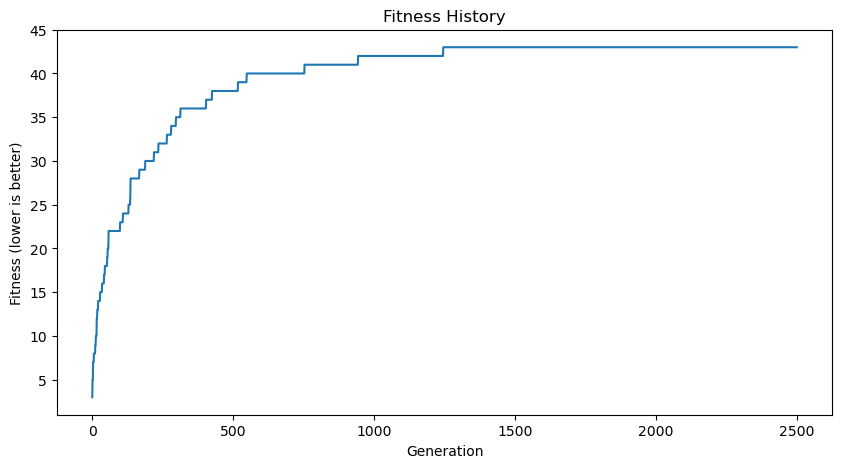

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title("Fitness History")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

In [11]:
target_image = Image.open('Data/fmi-logo-eng.png')

In [12]:
print(target_image.size)

(91, 58)


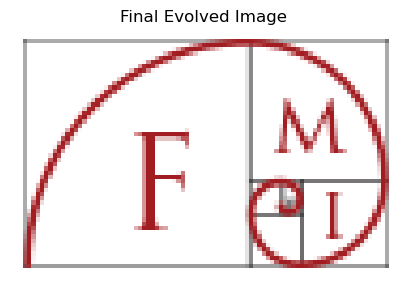

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(target_image)
plt.title("Final Evolved Image")
plt.axis('off')
plt.show()

In [14]:
class GeneticImageGenerator:
    def __init__(self, width=64, height=64, population_size=250, print_every=200):
        self.print_every=print_every

    
    def create_random_image(self):
        return np.random.randint(0, 256, (self.dna_width, self.dna_height, 3), dtype=np.uint8)
    
    def initialize_population(self, population_size):
        return [self.create_random_image() for _ in range(population_size)]
    
    def fitness(self, individual, target):
        return -np.sum(np.abs(individual.astype(float) - target.astype(float)))
    
    def crossover(self, parent1, parent2):
        child1 = np.zeros_like(parent1)
        child2 = np.zeros_like(parent1)
        # Random crossover mask
        mask = np.random.random(parent1.shape) < 0.5
        child1[mask] = parent1[mask]
        child1[~mask] = parent2[~mask]
        child2[mask] = parent2[mask]
        child2[~mask] = parent1[~mask]
        return child1, child2
    
    def mutate(self, agent, mut_prob):
        mutation_mask = np.random.random(agent.shape) < mut_prob
        agent[mutation_mask] = np.random.randint(0, 256, size=np.sum(mutation_mask)) # agent.shape
        return agent
    
    
    def next_generation(self, population, target, mut_prob):# -> tuple[list, Any, Any]:
        new_pop_size = len(population) // 10
        new_population = sorted(population, key=lambda x: self.fitness(x, target))[new_pop_size:]
        pop_fitness = [self.fitness(x, target) for x in new_population]
        best_dna = new_population[-1]
        left_parents = random.choices(new_population, k=new_pop_size, weights=pop_fitness - min(pop_fitness))
        right_parents = random.choices(new_population, k=new_pop_size, weights=pop_fitness - min(pop_fitness))

        for i in range(new_pop_size):
            left_child, right_child = self.crossover(left_parents[i], right_parents[i])
            left_child, right_child = self.mutate(left_child, mut_prob), self.mutate(right_child, mut_prob)
            if self.fitness(left_child, target) > self.fitness(right_child, target):
                new_population.append(left_child)
            else:
                new_population.append(right_child)

        return new_population, best_dna, pop_fitness[-1]

    
    def solve(self, target, population_size=500, num_generations=2000, mut_prob=0.005):
        self.dna_width, self.dna_height,   _= target.shape
        population = self.initialize_population(population_size)
        
        history = []
        
        for generation in range(num_generations):
            population, best_dna, best_fitness = self.next_generation(population, target, mut_prob)
            history.append(best_fitness)
        
            if generation % self.print_every == 0:
                print(f"Generation {generation}, Best Fitness: {best_fitness}")
                plt.imshow(population[0])
                plt.axis('off')
                plt.show()
        
        return population[0], population, history
    


# Example usage
def create_simple_target():
    """Create a simple target image with some shapes"""
    img = np.zeros((64, 64, 3), dtype=np.uint8)
    
    # Add a red circle
    y, x = np.ogrid[:64, :64]
    mask = (x - 32) ** 2 + (y - 32) ** 2 <= 20 ** 2
    img[mask] = [255, 0, 0]
    
    # Add a blue rectangle
    img[10:30, 40:60] = [0, 0, 255]
    
    return img



In [15]:
solver = GeneticImageGenerator()

Generation 0, Best Fitness: -1827373.0


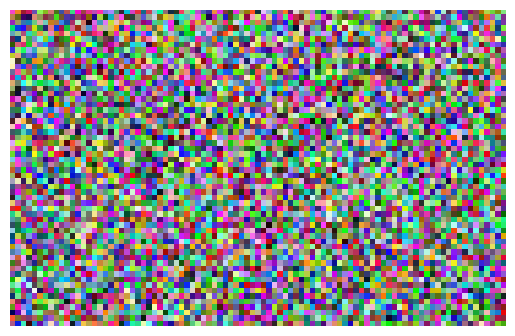

Generation 200, Best Fitness: -1512942.0


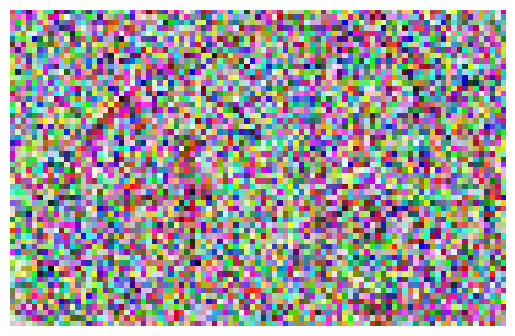

Generation 400, Best Fitness: -1324901.0


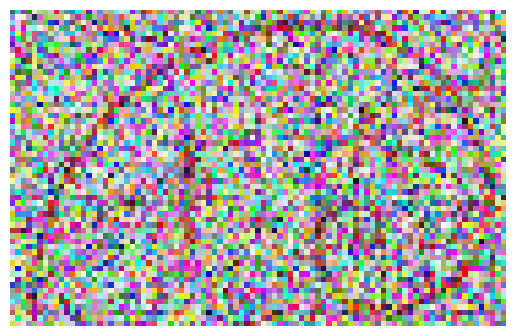

Generation 600, Best Fitness: -1202365.0


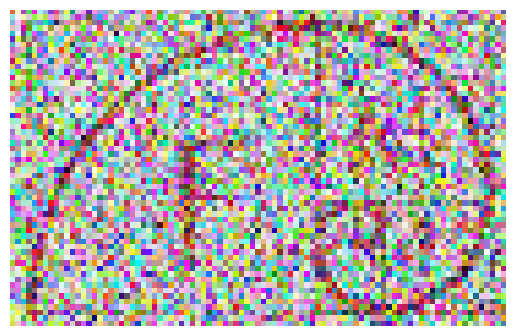

Generation 800, Best Fitness: -1120485.0


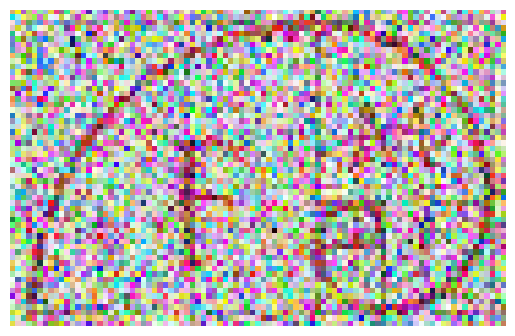

Generation 1000, Best Fitness: -1064911.0


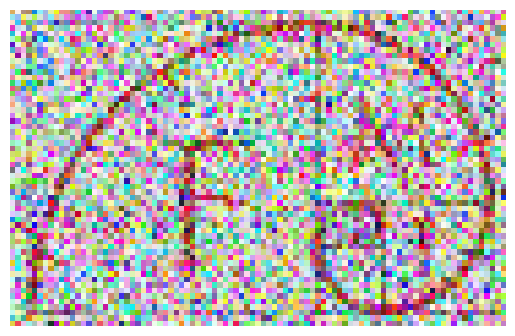

Generation 1200, Best Fitness: -1024574.0


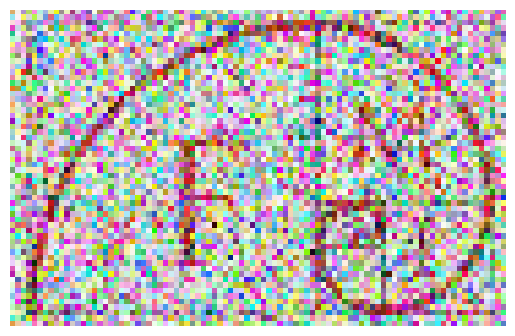

Generation 1400, Best Fitness: -984139.0


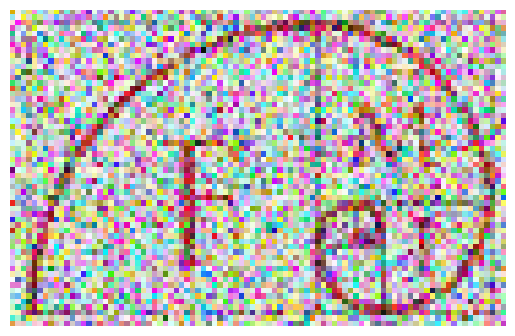

Generation 1600, Best Fitness: -951658.0


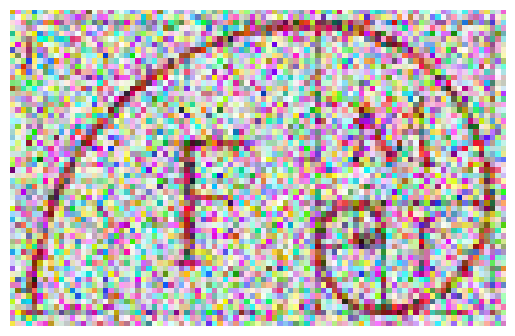

Generation 1800, Best Fitness: -927349.0


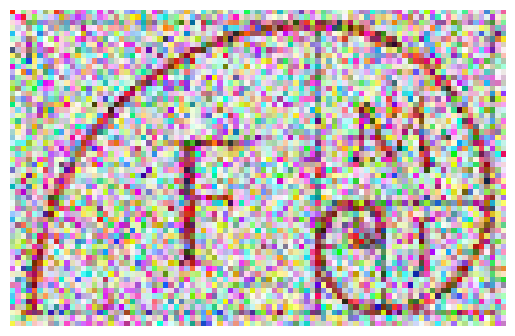

In [16]:
best, population, history = solver.solve(np.array(target_image))

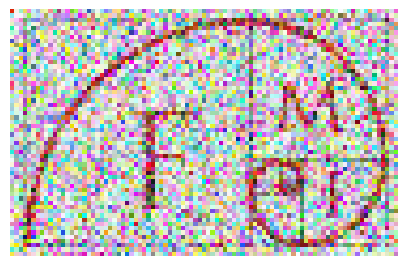

In [17]:
plt.figure(figsize=(5, 5))
plt.imshow(best)
plt.axis('off')
plt.show()

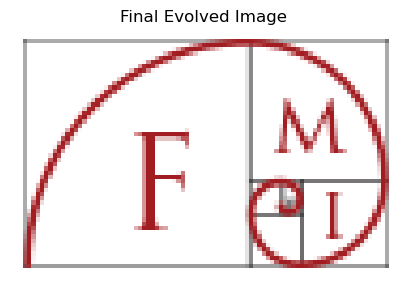

In [18]:
plt.figure(figsize=(5, 5))
plt.imshow(target_image)
plt.title("Final Evolved Image")
plt.axis('off')
plt.show()